<a href="https://colab.research.google.com/github/Yashashvi01/CSV_Analyser_GeminiAI/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Dataset Information

#### Context:
Credit card companies need to detect fraudulent transactions to prevent customers from being charged for unauthorized purchases.

#### Content:
- **Dataset**: Transactions made by European cardholders in September 2013.
- **Duration**: Two days, with 492 frauds out of 284,807 transactions.
- **Class Imbalance**: Fraudulent transactions (positive class) account for 0.172% of all transactions.
- **Features**:
  - Numerical input variables resulting from PCA transformation.
  - 'Time': Seconds elapsed between each transaction and the first transaction.
  - 'Amount': Transaction amount, suitable for cost-sensitive learning.

- **Target**:
  - 'Class': Response variable, 1 for fraud, 0 otherwise.
  
#### Source:
- The dataset has been collected and analyzed by Worldline and the Machine Learning Group (MLG) of Université Libre de Bruxelles (ULB) as part of a research collaboration on big data mining and fraud detection.
- More details on the current and past projects related to fraud detection are available on the [MLG website](http://mlg.ulb.ac.be) and [ResearchGate](https://www.researchgate.net/project/Fraud-detection-5).

#### Recommendations:
- Due to class imbalance, accuracy should be measured using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful.
  




## 2. Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!unzip /content/creditcard.csv.zip

Archive:  /content/creditcard.csv.zip
  inflating: creditcard.csv          


In [ ]:
# Read the CSV file 'creditcard.csv' into a Pandas DataFrame named df
df = pd.read_csv('/content/creditcard.csv')


In [ ]:
# Display the first few rows of the DataFrame df
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Display a concise summary of the DataFrame df, including column names, non-null counts...
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Print the shape of the dataset (number of rows and columns)
print('Shape Of The Dataset', df.shape)

# Print the unique class categories in the 'Class' column
print('Class Categories', df['Class'].unique())

# Print the number of records with the class value 0 in the 'Class' column
print('Number Of Records With The Class Value 0: ', (df.Class == 0).sum())

# Print the number of records with the class value 1 in the 'Class' column
print('Number Of Records With The Class Value 1: ', (df.Class == 1).sum())


Shape Of The Dataset (284807, 31)
Class Categories [0 1]
Number Of Records With The Class Value 0:  284315
Number Of Records With The Class Value 1:  492


<Axes: xlabel='Class', ylabel='count'>

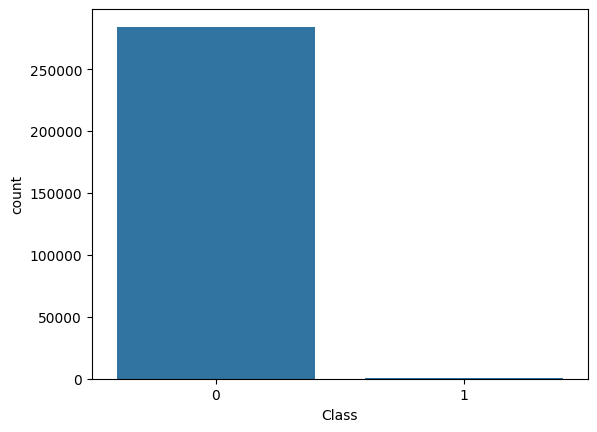

In [ ]:
# Create a count plot to visualize the distribution of classes in the 'Class' column of the DataFrame df
sns.countplot(x='Class', data=df)


<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    Credit card fraud datasets, including this one, are typically highly imbalanced because occurrences of fraud are rare compared to normal transactions. In the next sections, we will explore effective strategies for handling this imbalance.
</div>

In [ ]:
# The data is stardarized, I will explore them later
#For now I will look the "normal" columns
df[["Time","Amount","Class"]].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


# Exploring Time feature engineering

In [ ]:
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

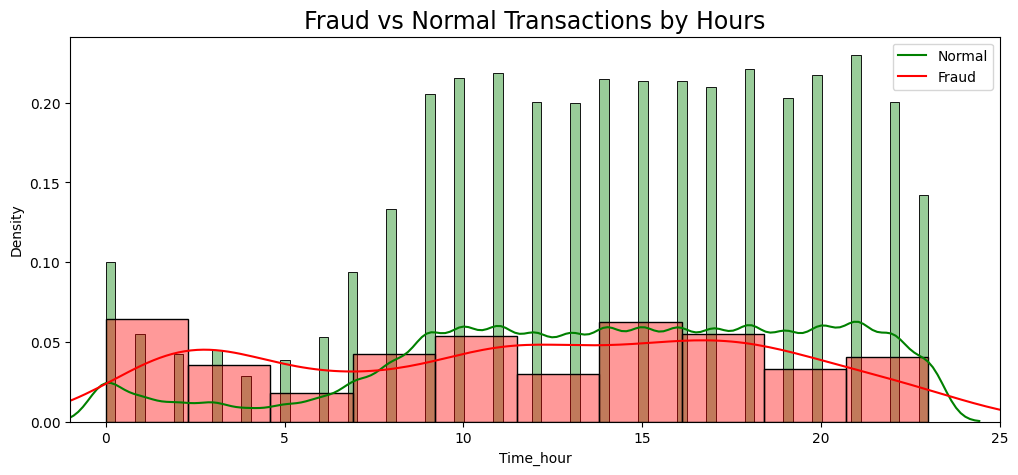

In [ ]:
#Exploring the distribuition by Class types throught hours and minutes
plt.figure(figsize=(12,5))

sns.histplot(df[df['Class'] == 0]["Time_hour"],
             color='g',stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})
sns.histplot(df[df['Class'] == 1]["Time_hour"],
             color='r',stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})
plt.legend(['Normal', 'Fraud'])

plt.title('Fraud vs Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

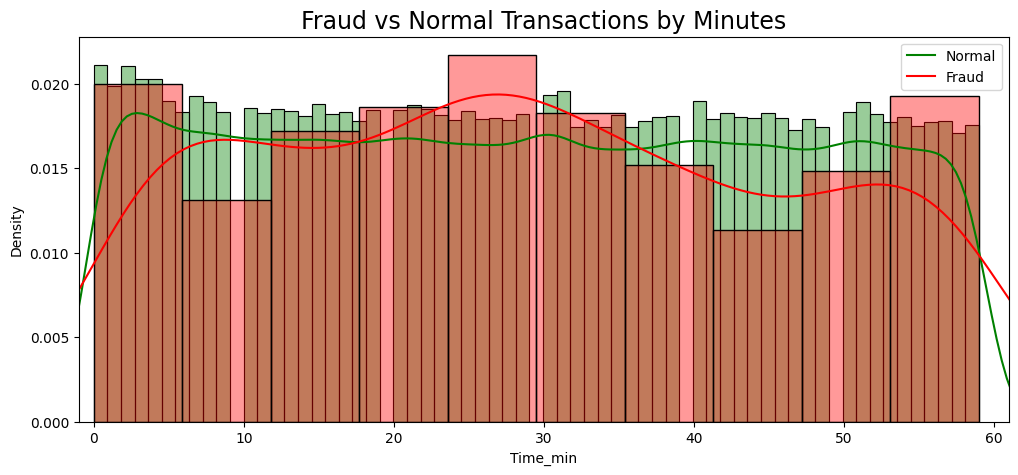

In [ ]:
#Exploring the distribuition by Class types throught hours and minutes
plt.figure(figsize=(12,5))

sns.histplot(df[df['Class'] == 0]["Time_min"],
             color='g',stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})
sns.histplot(df[df['Class'] == 1]["Time_min"],
             color='r',stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})
plt.legend(['Normal', 'Fraud'])

plt.title('Fraud vs Normal Transactions by Minutes', fontsize=17)
plt.xlim([-1,61])
plt.show()

We are not able to see clear differentiations to figure out possilbe outcomes from time.
Let's try and examine amount
# Amount feature engineering

In [ ]:
#To clearly the data of frauds and no frauds
df_fraud = df[df['Class'] == 1]
df_normal = df[df['Class'] == 0]

print("Fraud transaction statistics")
print(df_fraud["Amount"].describe())
print("\nNormal transaction statistics")
print(df_normal["Amount"].describe())

Fraud transaction statistics
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal transaction statistics
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [ ]:
#Feature engineering to a better visualization of the values
df['Amount_log'] = np.log(df.Amount + 0.01)

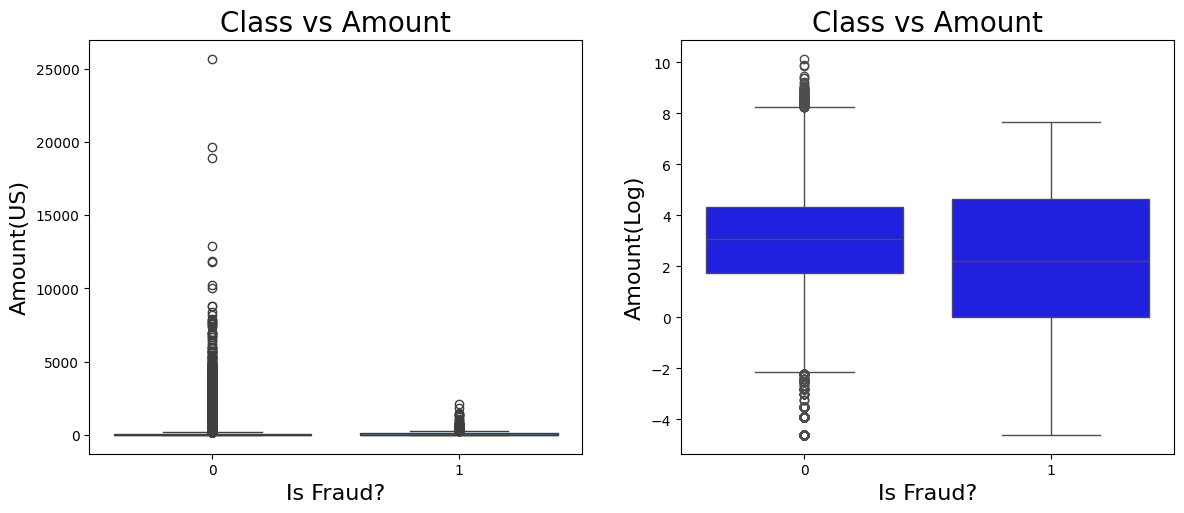

In [ ]:
plt.figure(figsize=(14,6))
#I will explore the Amount by Class and see the distribuition of Amount transactions
plt.subplot(121)
ax = sns.boxplot(x ="Class",y="Amount",
                 data=df)
ax.set_title("Class vs Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Amount(US)", fontsize = 16)

plt.subplot(122)
ax1 = sns.boxplot(x ="Class",y="Amount_log", data=df,color='b')
ax1.set_title("Class vs Amount", fontsize=20)
ax1.set_xlabel("Is Fraud?", fontsize=16)
ax1.set_ylabel("Amount(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

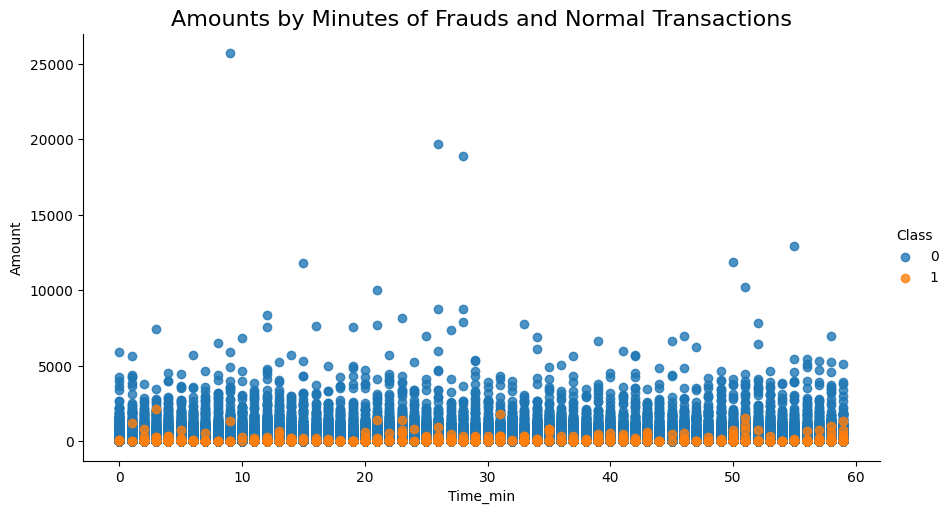

In [ ]:
#Looking the Amount and time distribuition of FRAUD transactions
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8,
                data=df, hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=16)
plt.show()

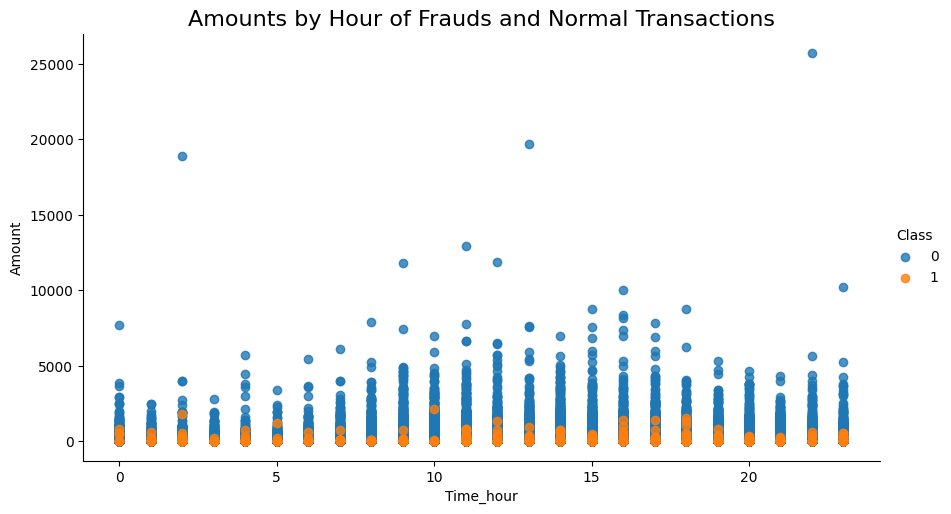

In [ ]:
ax = sns.lmplot(y="Amount", x="Time_hour", fit_reg=False,aspect=1.8,
                data=df, hue='Class')
plt.title("Amounts by Hour of Frauds and Normal Transactions", fontsize=16)

plt.show()

We can conclude clear differences between fraud and non fraud transactions based on amount.

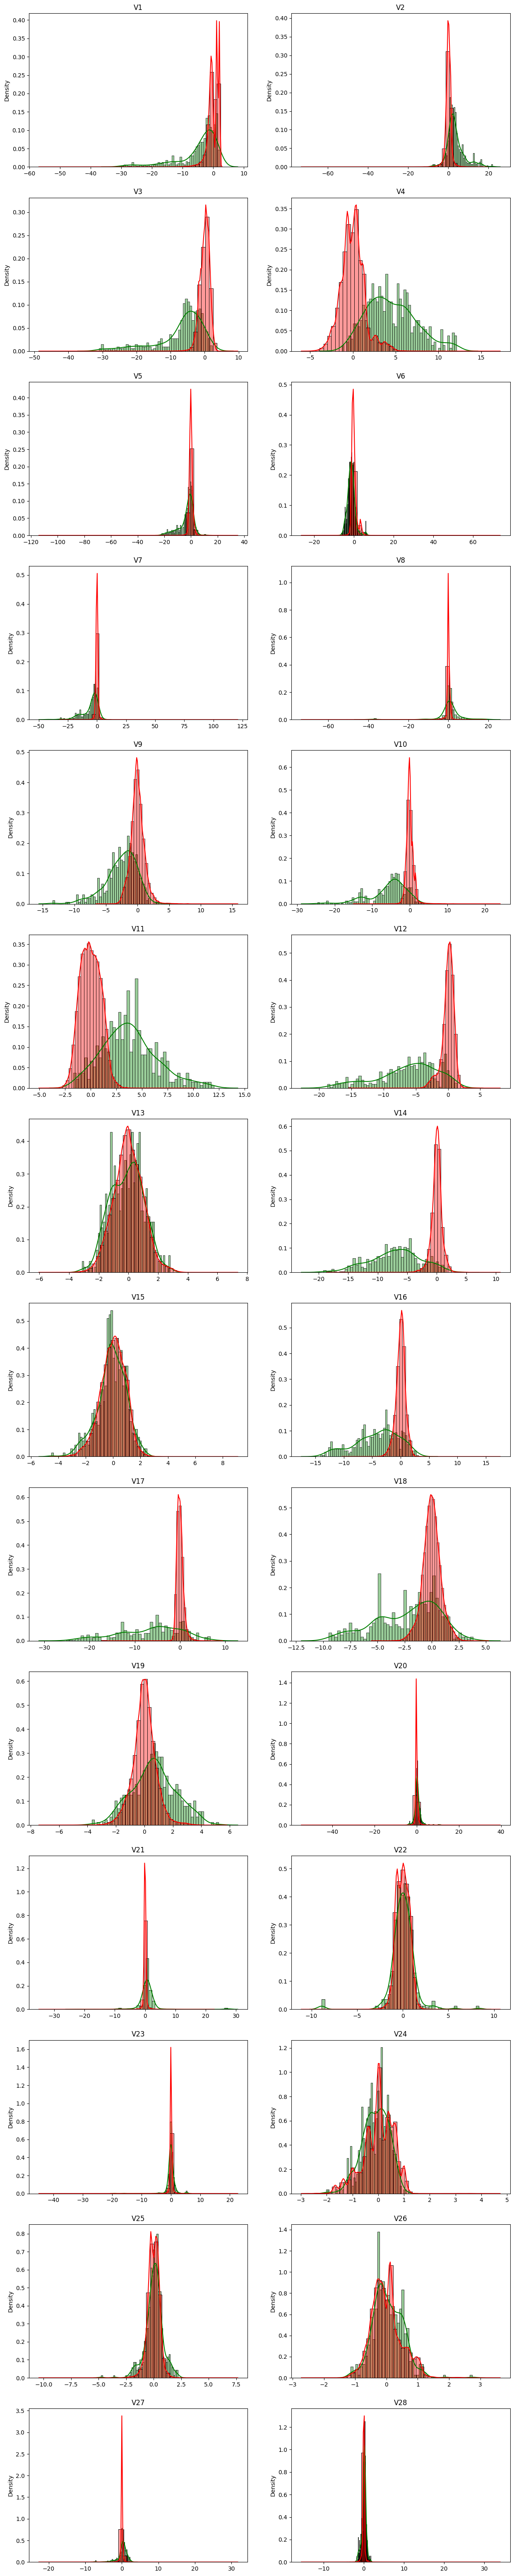

In [ ]:
#Looking the V's features
import matplotlib.gridspec as gridspec
columns = df.iloc[:,1:29].columns

frauds = df.Class == 1
normals = df.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.histplot(df[col][frauds], bins = 50, color='g',stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3}) #Will receive the "semi-salmon" violin
    sns.histplot(df[col][normals], bins = 50, color='r',stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3}) #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Time_min,Time_hour,Amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0,5.008166
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0,0.993252
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0,5.936665
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0,4.816322
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0,4.248495


In [ ]:
#I will select the variables where fraud class have a interesting behavior and might can help us predict

df = df[["Time_hour","Time_min","V2","V3","V4","V9","V10","V11","V12","V14","V16","V17","V18","V19","V27","Amount","Class"]]

df.loc[:, 'Amount'] = np.log(df['Amount'] + 0.001)

df.head()

,Time_hour,Time_min,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19,V27,Amount,Class
0,0,0,-0.072781,2.536347,1.378155,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.133558,5.008105,0
1,0,0,0.266151,0.166480,0.448154,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.008983,0.989913,0
2,0,0,-1.340163,1.773209,0.379780,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,-0.055353,5.936641,0
3,0,0,-0.185226,1.792993,-0.863291,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,0.062723,4.816249,0
4,0,0,0.877737,1.548718,0.403034,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.219422,4.248367,0


## 3. Features Selection

In [ ]:
# Calculate the correlation between the 'Class' column and the first 30 columns
x = df.corr()['Class'][:16]
x

,Class
Time_hour,-0.017109
Time_min,-0.000124
V2,0.091289
V3,-0.192961
V4,0.133447
V9,-0.097733
V10,-0.216883
V11,0.154876
V12,-0.260593
V14,-0.302544


<Axes: title={'center': 'Correlation Of Features With Target Variable'}>

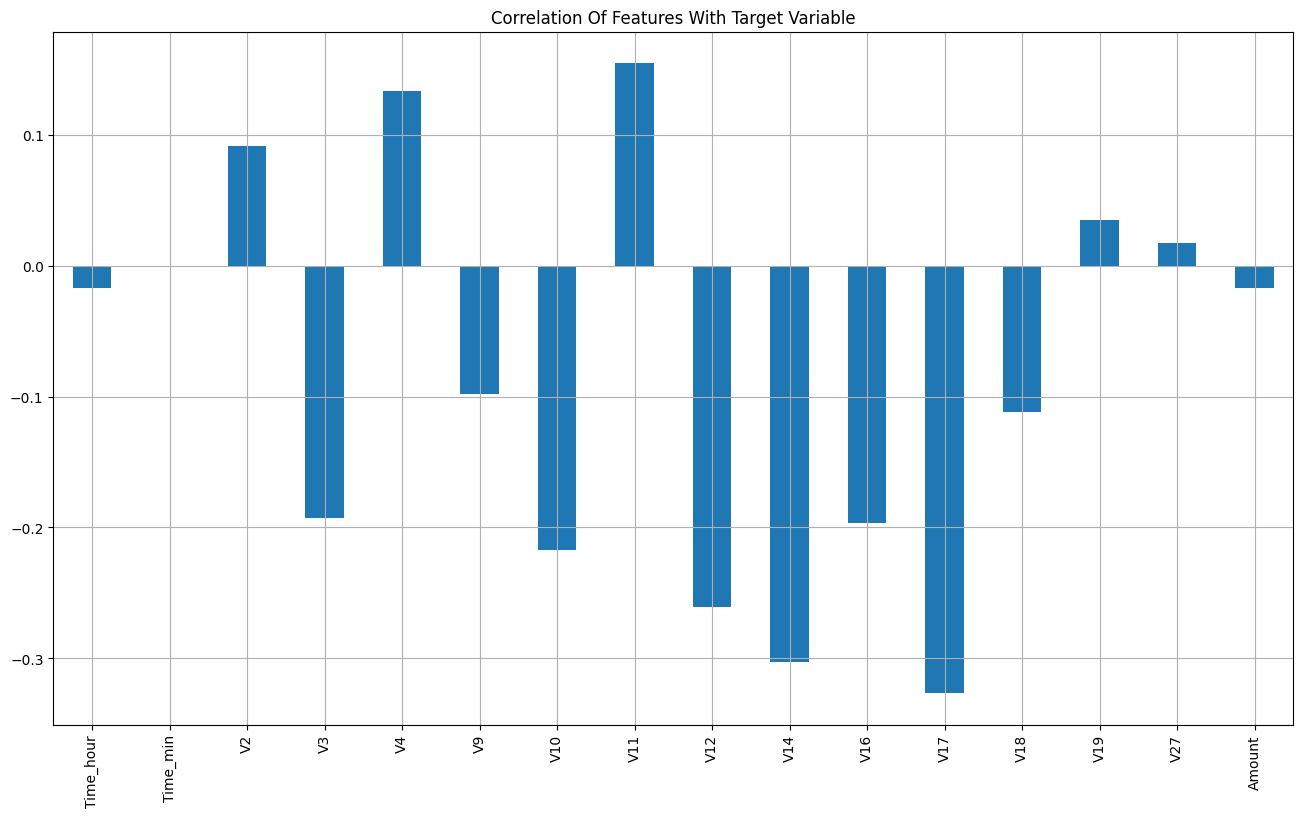

In [ ]:
# Calculate the correlation coefficients between the 'Class' column and the first 30 columns
x = df.corr()['Class'][:16]

# Create a bar plot to visualize the correlation of features with the target variable 'Class'
x.plot.bar(figsize=(16, 9), title="Correlation Of Features With Target Variable", grid=True)

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    Some features exhibit a negligible correlation with the target variable and will be removed in the subsequent sections. First, we'll examine the intercorrelation among variables.
</div>

<Axes: >

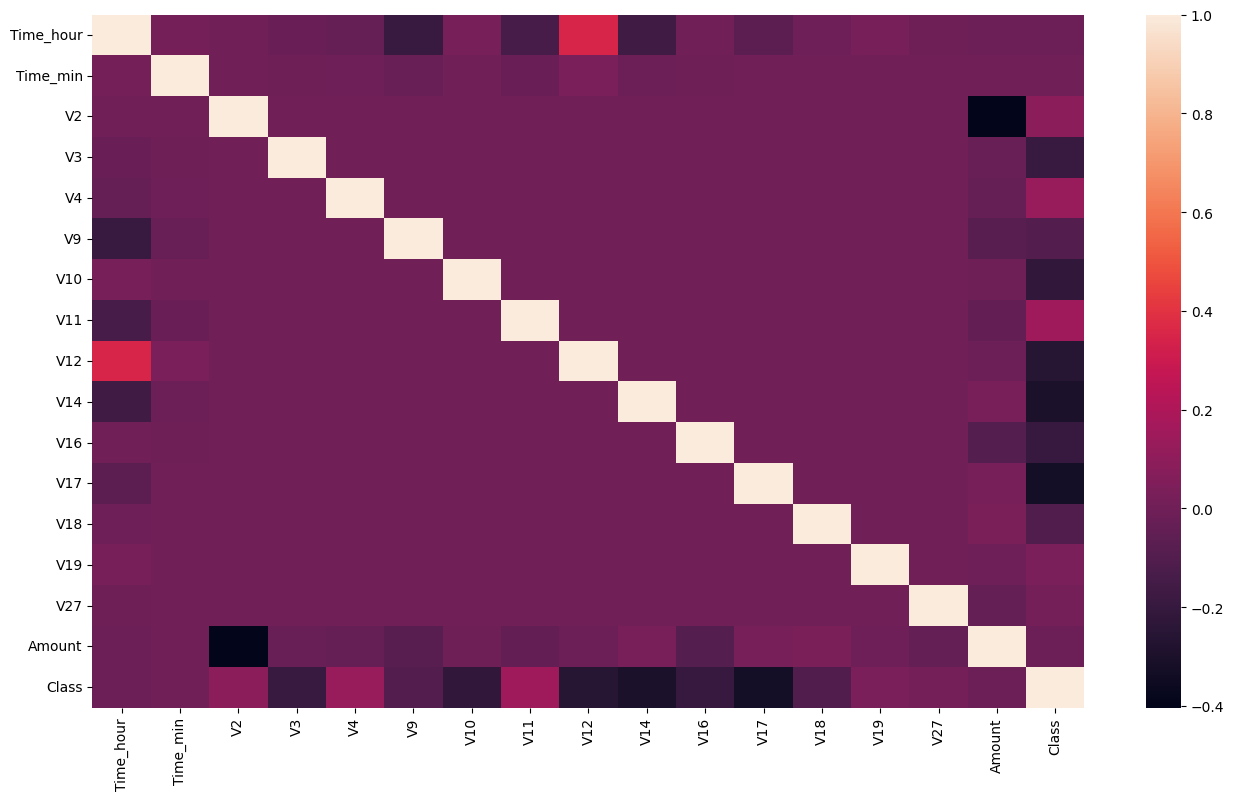

In [ ]:
# Create a figure with a specific size for the heatmap
plt.figure(figsize=(16, 9))

# Create a heatmap to visualize the correlation matrix of the DataFrame df
sns.heatmap(df.corr())

# 3. Data preprocessing using SMOTE

In [ ]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score

In [ ]:
df2 = df.copy()
X = df2.drop(["Class"], axis=1).values #Setting the X to do the split
y = df2["Class"].values # transforming the values in array

Checking if there is any null value as SMOTE doesn't work for NAN values

In [ ]:
df2.isnull().sum()

,0
Time_hour,0
Time_min,0
V2,0
V3,0
V4,0
V9,0
V10,0
V11,0
V12,0
V14,0


In [ ]:
# the function that we will use to better evaluate the model
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f2: {}".format(fbeta_score(true_value, pred, beta=2)))

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.20)

classifier = RandomForestClassifier

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
                                   classifier(random_state=42))

smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)

#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE().fit_resample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))

print("Confusion Matrix: ")
print(confusion_matrix(y_test, smote_prediction))

print('\nSMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test, y_test)))

print_results("\nSMOTE + RandomForest classification", y_test, smote_prediction)

normal data distribution: Counter({0: 284315, 1: 492})
SMOTE data distribution: Counter({0: 284315, 1: 284315})
Confusion Matrix: 
[[56867    11]
 [   12    72]]

SMOTE Pipeline Score 0.9995962220427653

SMOTE + RandomForest classification
accuracy: 0.9995962220427653
precision: 0.8674698795180723
recall: 0.8571428571428571
f2: 0.8591885441527445


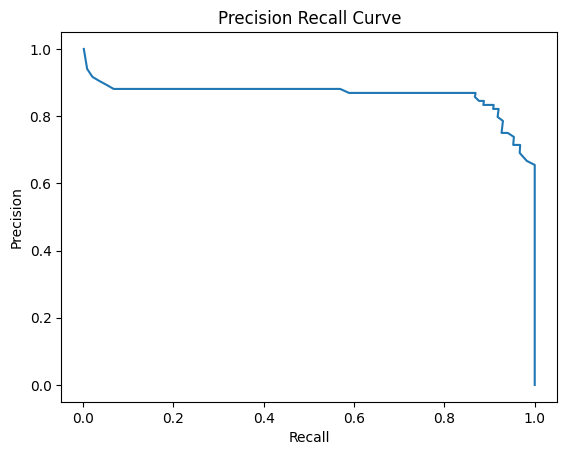

In [ ]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = smote_pipeline.predict_proba(X_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

We observe that the model is overfitting.
Hence, Let's try to resolve this.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
#params of the model
param_grid = {"max_depth": [3,5, None],
              "n_estimators":[3,5,10],
              "max_features": [5,6,7,8]}

# Creating the classifier
model = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion='entropy', n_jobs=1, verbose=1 )
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7841915085817526
{'max_depth': 5, 'max_features': 7, 'n_estimators': 5}


In [ ]:
# Running the fit
rf = RandomForestClassifier(max_depth=5, max_features = 7, n_estimators = 5)
rf.fit(X_train, y_train)

# Printing the Training Score
print("Training score data: ")
print(rf.score(X_train, y_train))

Training score data: 
0.9995259935482456


In [ ]:
#Testing the model
#Predicting by X_test
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print_results("RF classification", y_test, y_pred)

[[56872     6]
 [   17    67]]
RF classification
accuracy: 0.9995962220427653
precision: 0.9178082191780822
recall: 0.7976190476190477
f2: 0.8190709046454768


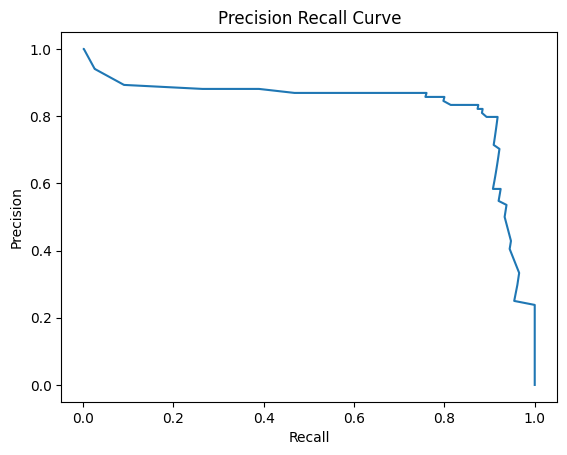

In [ ]:
#Predicting proba
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [ ]:
results = cross_val_score(rf,X_train, y_train, cv=10, scoring='recall')
results

array([0.73170732, 0.68292683, 0.75609756, 0.68292683, 0.80487805,
       0.75      , 0.775     , 0.80487805, 0.7804878 , 0.75609756])

# Feature Importance

<ipython-input-36-70c527fc6e3f>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


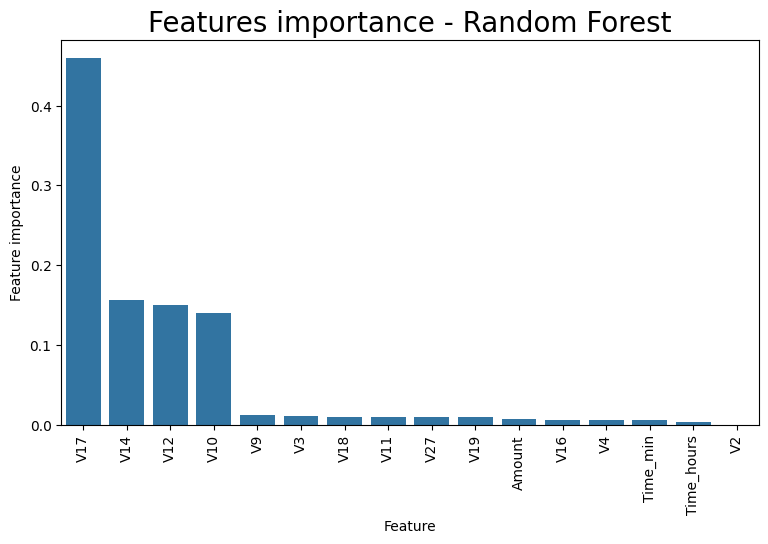

In [ ]:
features = ["Time_min", 'Time_hours',"V2","V3","V4","V9","V10","V11","V12","V14","V16","V17","V18","V19","V27","Amount"]

plt.figure(figsize = (9,5))

feat_import = pd.DataFrame({'Feature': features, 'Feature importance': rf.feature_importances_})
feat_import = feat_import.sort_values(by='Feature importance',ascending=False)

g = sns.barplot(x='Feature',y='Feature importance',data=feat_import)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Features importance - Random Forest',fontsize=20)
plt.show()

After analysing the above graph we observe that only few features are important to the model parameters, therefore we can improve the model by better feature selection.

I also wanted to try downsampling as a procedure for the same for data imbalance handling.
# 4. Down Sampling

In [ ]:
df2.head()

,Time_hour,Time_min,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19,V27,Amount,Class
0,0,0,-0.072781,2.536347,1.378155,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.133558,5.008105,0
1,0,0,0.266151,0.166480,0.448154,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.008983,0.989913,0
2,0,0,-1.340163,1.773209,0.379780,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,-0.055353,5.936641,0
3,0,0,-0.185226,1.792993,-0.863291,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,0.062723,4.816249,0
4,0,0,0.877737,1.548718,0.403034,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.219422,4.248367,0


In [ ]:
# Calculate the correlation coefficients between 'Class' and all columns
y = df.corr()['Class']

# Create a copy of the DataFrame df
df2 = df.copy()

# Iterate through columns and drop those with absolute correlation less than 0.13
for i in df.columns:
    if abs(y[i]) < 0.13:
        df2.drop(columns=[i], inplace=True)


In [ ]:
# Display the first few rows of the DataFrame df2
df2.head()

,V3,V4,V10,V11,V12,V14,V16,V17,Class
0,2.536347,1.378155,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,0.448154,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.379780,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,-0.863291,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.403034,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0


<Axes: >

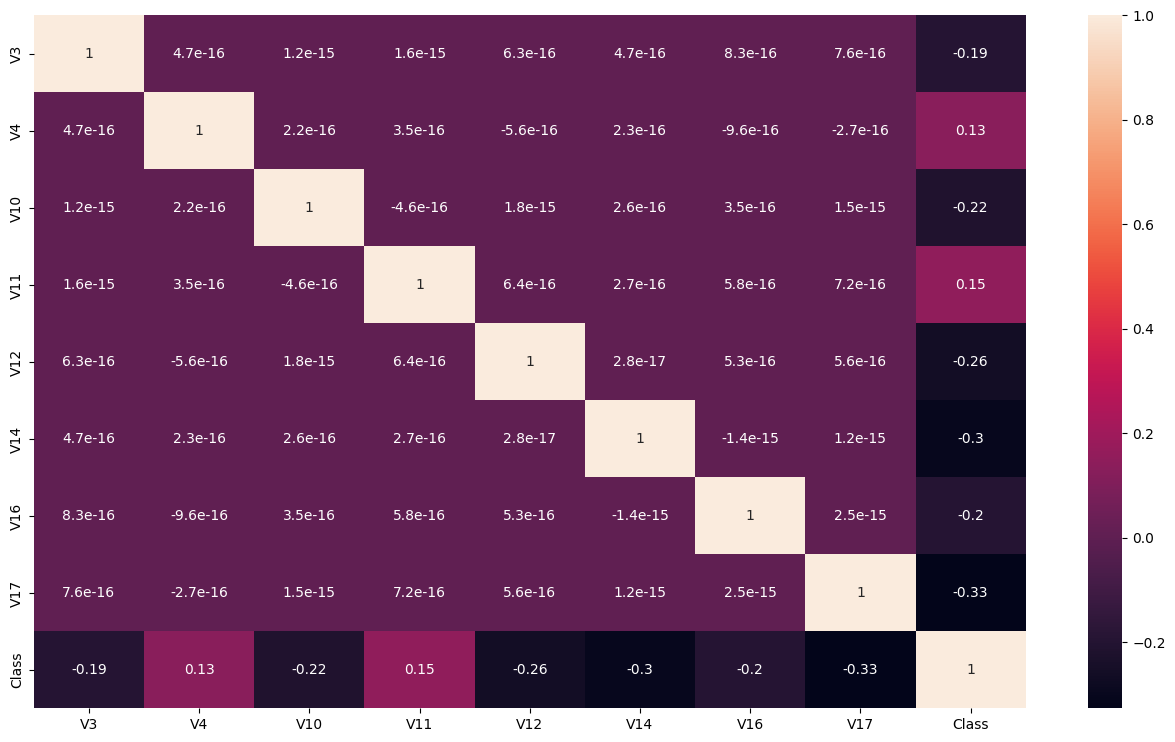

In [ ]:
# Create a figure with a specific size for the heatmap
plt.figure(figsize=(16, 9))

# Create a heatmap to visualize the correlation matrix of the DataFrame df2
sns.heatmap(df2.corr(), annot=True)

<Axes: title={'center': 'Top Correlated Features With The Target Variable'}>

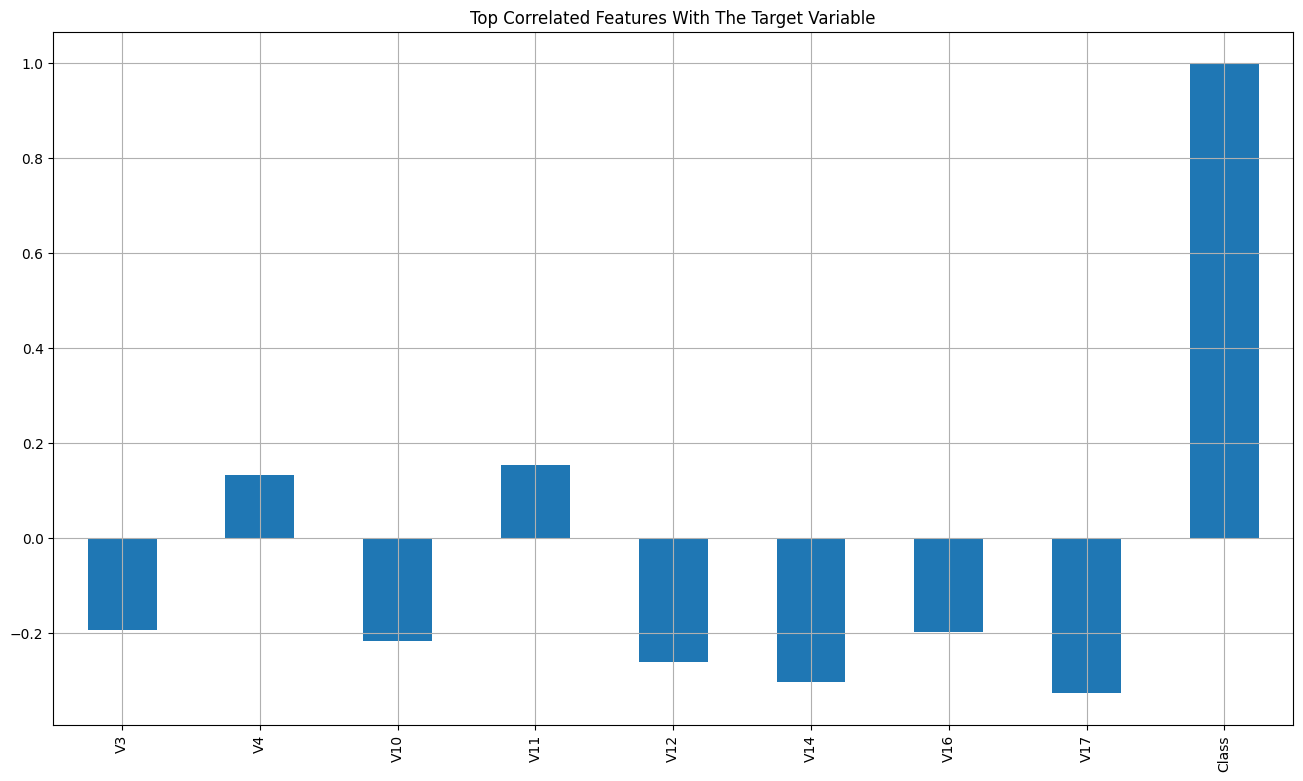

In [ ]:
# Calculate the correlation coefficients between the 'Class' column
x = df2.corr()['Class'][:9]

# Create a bar plot to visualize the top correlated features with the target variable 'Class'
x.plot.bar(figsize=(16, 9), title="Top Correlated Features With The Target Variable", grid=True)


## 5. Handling Data Imbalance



- This dataset consists of:
  - Number of records with the class value 0: 284,315
  - Number of records with the class value 1: 492

Using this dataset as it is would be a fatal mistake due to its severe class imbalance. Here's why:

- **Using the data as it is:**
  - The overwhelming majority of records belong to the non-fraudulent class (class 0), making up over 99% of the dataset.
  - Models trained on imbalanced data may prioritize accuracy on the majority class while neglecting the minority class (fraudulent transactions). This can result in poor performance in detecting fraud.

- **Why oversampling is a fatal mistake:**
  - Oversampling techniques like SMOTE (Synthetic Minority Over-sampling Technique) artificially inflate the minority class by generating synthetic examples. However, this can lead to overfitting and the introduction of noise, especially in cases where the minority class is already sparsely represented.

- **Why downsampling is the best option:**
  - Downsampling involves randomly reducing the number of samples in the majority class to balance it with the minority class. This approach helps mitigate the biases towards the majority class while maintaining the integrity of the dataset.
  - By reducing the number of majority class samples to match the minority class, downsampling encourages the model to learn from both classes equally, improving its ability to accurately detect fraudulent transactions.



In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Separate features (X) and target (y)
X = df2.drop('Class', axis=1)
y = df2['Class']

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and apply the resampler to the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
downsampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)


downsampled_df.head()

,V3,V4,V10,V11,V12,V14,V16,V17,Class
138028,-0.666593,0.716564,-0.597739,-0.325347,-0.216435,-1.054631,0.601226,0.631117,0
63099,0.904547,0.694584,0.170547,0.821998,0.468322,0.573006,-0.011633,-0.504570,0
73411,1.122074,-1.308725,2.051312,0.575866,-0.594037,-0.338340,-0.756390,0.535141,0
164247,-0.987421,-0.029567,-1.238598,-0.841133,-0.586472,-0.436671,0.266437,0.703234,0
148999,0.269272,3.866438,1.166335,1.297531,-1.920966,1.323225,1.317655,-0.441076,0


In [ ]:
# Display the shape of the downsampled DataFrame downsampled_df
downsampled_df.shape

(984, 9)

## 6. Outliers?

<Axes: xlabel='Class', ylabel='count'>

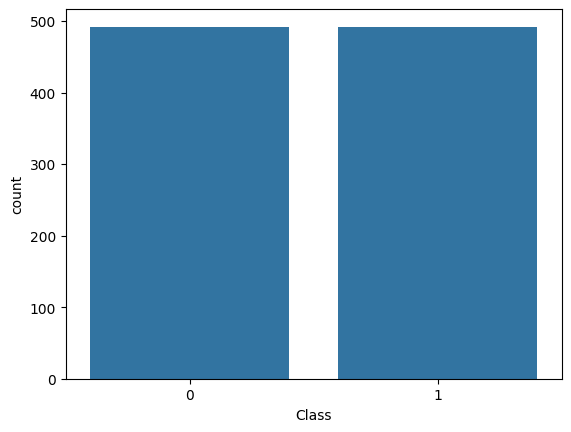

In [ ]:
# Create a count plot to visualize the distribution of classes in the 'Class' column of the downsampled DataFrame downsampled_df
sns.countplot(x='Class', data=downsampled_df)


<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    Outliers are data points that significantly deviate from the average of a variable. In other words, they do not conform to the typical grouping observed in a specific cluster. Did you notice something interesting in this plot? The blue dots represent normal transactions, tightly clustered with very few outliers. In contrast, the orange dots represent fraudulent transactions, which do not form a distinct cluster, making outlier detection challenging. Is this pattern consistent across all variables or just in this example?
</div>

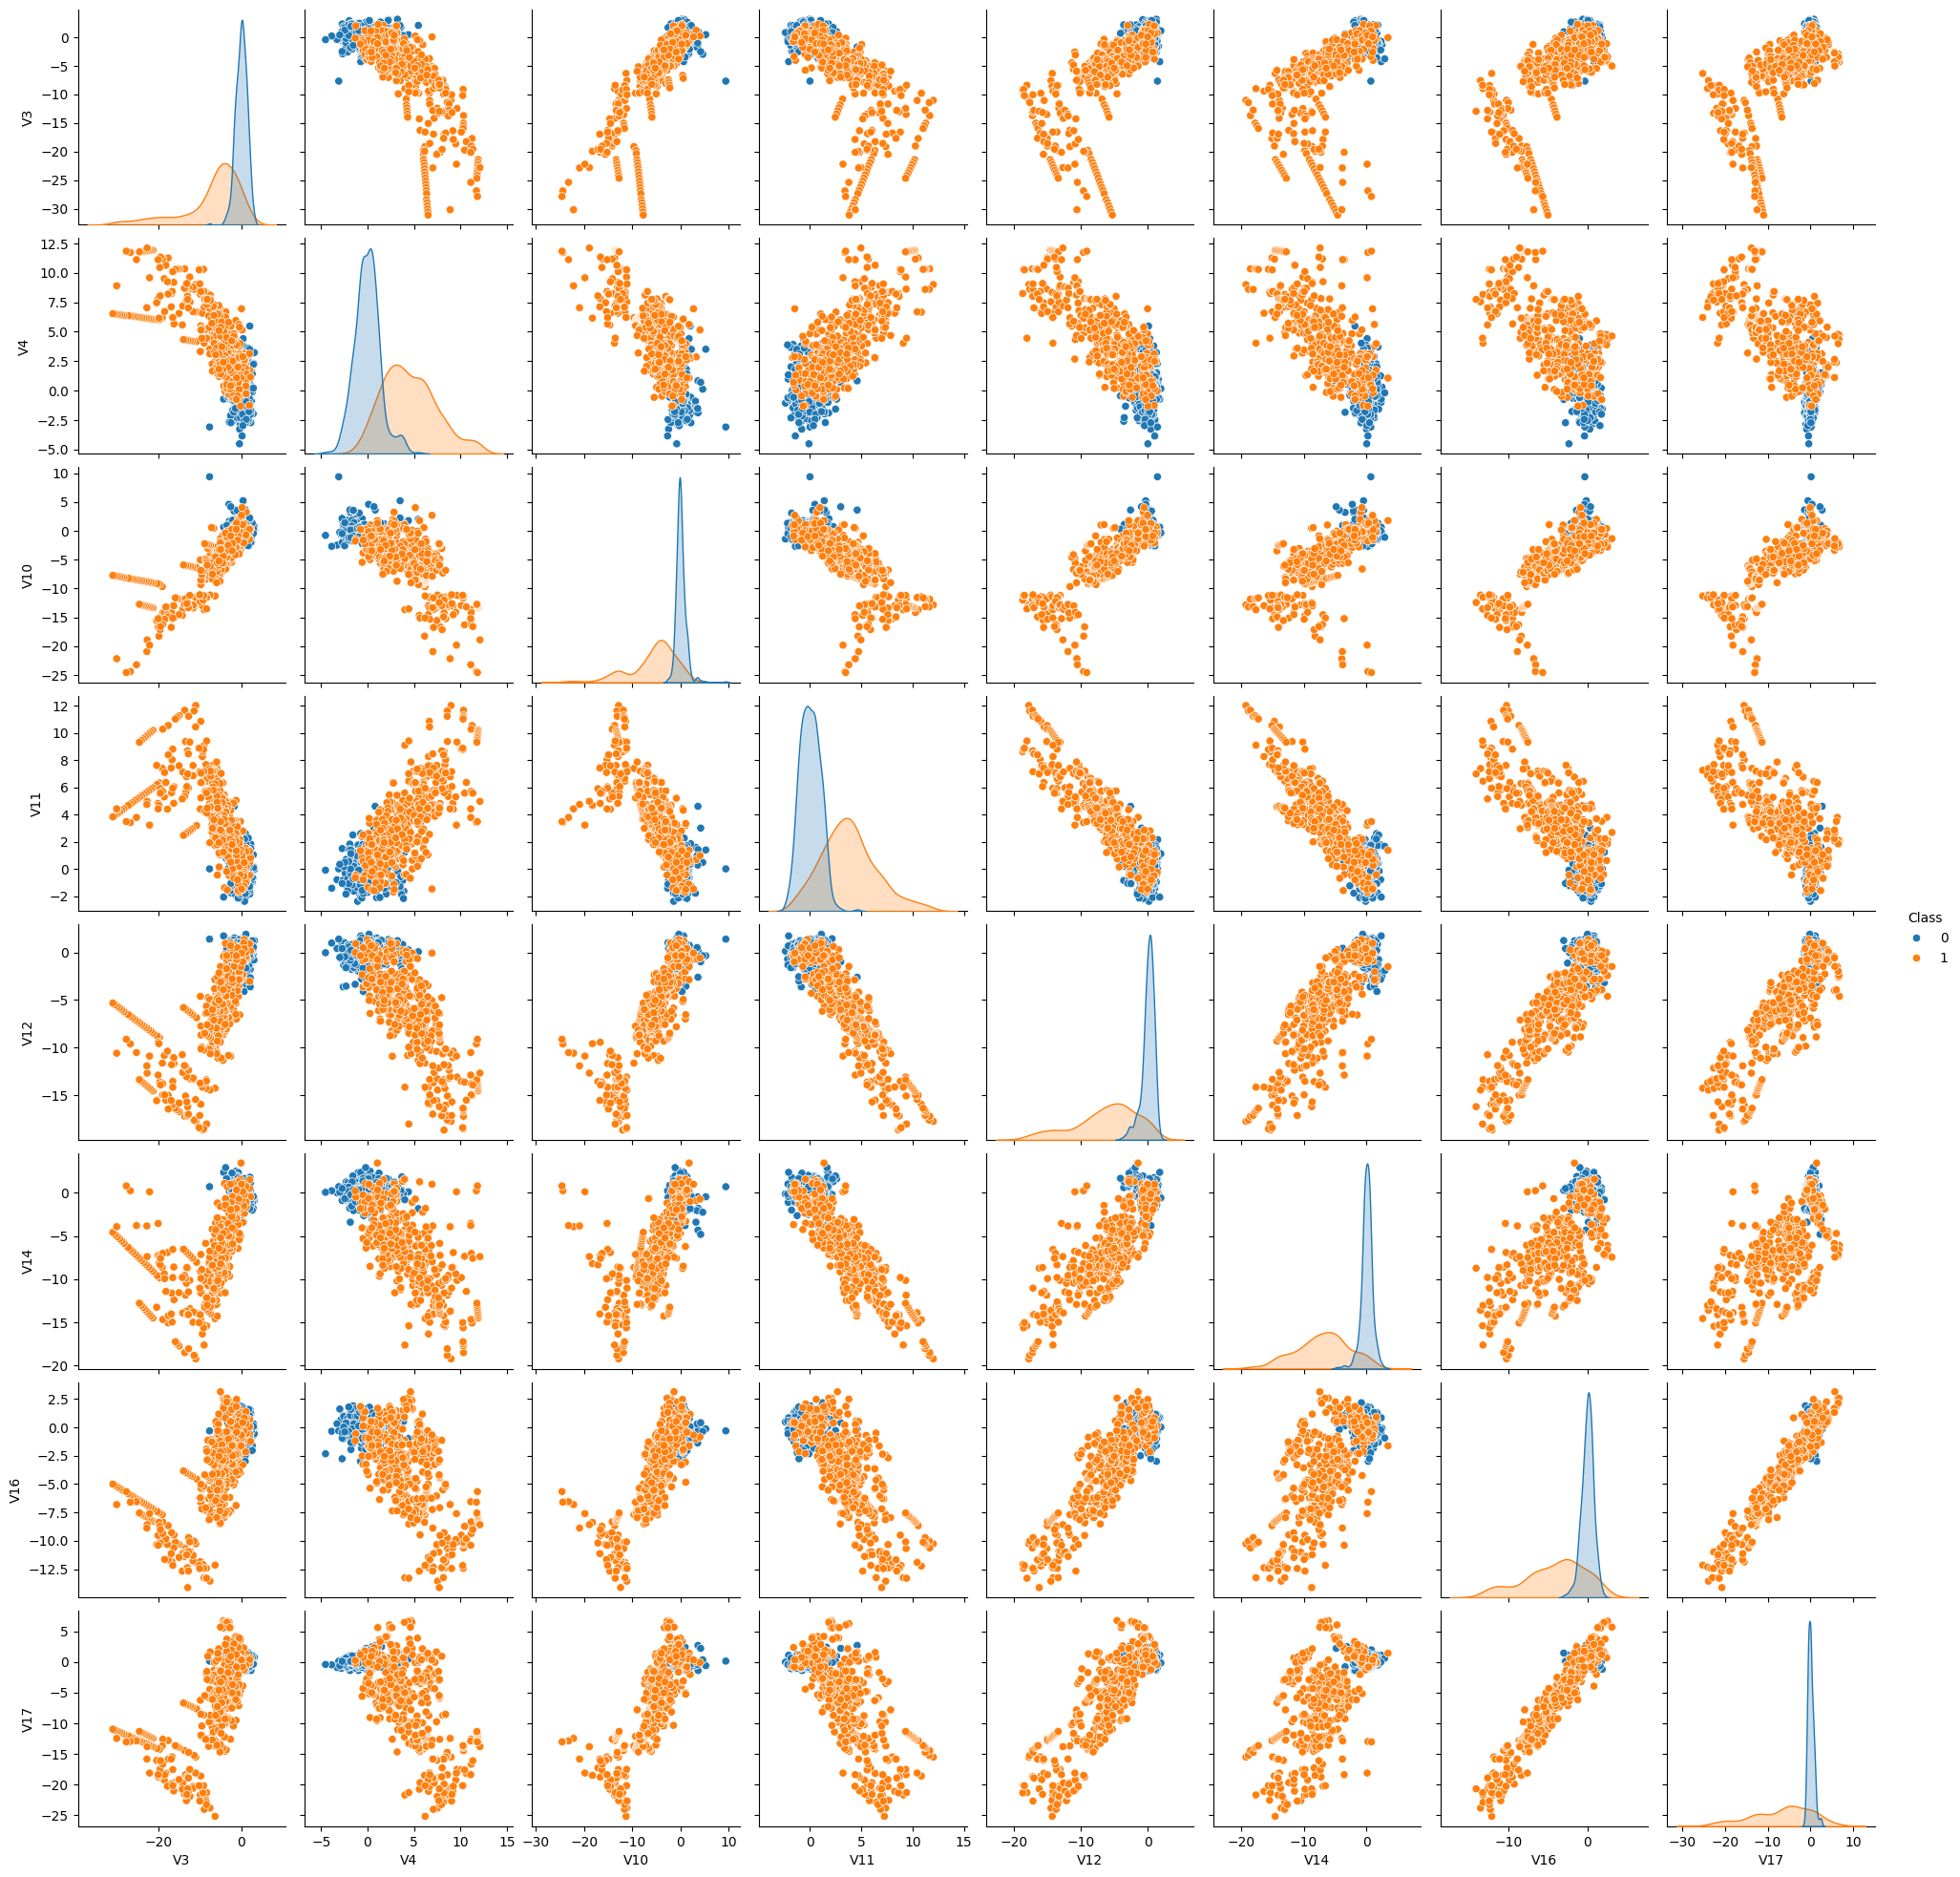

In [ ]:
import warnings

# To ignore all warnings
warnings.filterwarnings('ignore')
# Pair Plot of all variables
sns.pairplot(downsampled_df, hue='Class')

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    Normal transactions form a distinct cluster across all variables, whereas fraudulent transactions do not exhibit a specific cluster. This makes outlier detection extremely challenging. Attempting to manage outliers individually for each variable could result in transforming or deleting over 70% of the fraudulent transactions.
</div>

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana;">
     Fraudulent transactions do not exhibit clustering behavior and do not conform to a normal distribution, making outlier identification challenging.
    

<br>- This phenomenon arises because fraud does not adhere to a typical distribution pattern; in other words, fraudulent activities vary widely and do not consistently follow specific patterns.

<br>- Fraudsters employ diverse methods that evolve over time. It's important to note that simply obtaining credit card details and full names is insufficient for completing transactions. Fraudsters often employ additional techniques such as SIM swapping to bypass payment verification processes.

<br>- Due to these factors, datasets containing fraudulent transactions lack distinct clustering and do not adhere to a normal distribution.

<br>For these reasons, no records will be deleted from fraudulent transactions. Additionally, it's important to consider that fraudulent transactions are rare, making each record valuable.

<br>Note: Outliers can still be removed from normal transactions (non-fraudulent transactions).
</div>


## 7. Proper Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix

# Original imbalanced data (df2)
X = df2.drop(columns='Class')
y = df2['Class']

# Step 1: Split the original data into training and testing sets with stratification
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Downsample only the training data to ensure no data leakage
train_data = X_train_orig.copy()
train_data['Class'] = y_train_orig

# Separate the majority and minority classes in the training data
majority_class = train_data[train_data['Class'] == 0]  # Assuming 0 is the majority class
minority_class = train_data[train_data['Class'] == 1]  # Assuming 1 is the minority class

# Downsample the majority class
majority_downsampled = resample(majority_class,
                                replace=False,    # sample without replacement
                                n_samples=len(minority_class),  # match minority class size
                                random_state=42)  # reproducible results

# Combine the downsampled majority class with the minority class
downsampled_train_data = pd.concat([majority_downsampled, minority_class])

# Step 3: Prepare the downsampled training set and the original test set
X_train_downsampled = downsampled_train_data.drop(columns='Class')
y_train_downsampled = downsampled_train_data['Class']

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana;">
     To properly split the data, we need to follow these rules:

- **Use a stratified split:** Since the data is highly imbalanced, a random split might result in a training or test set with no fraud transactions. Fraud transactions represent only a fraction of the dataset, so the risk of ending up with a dataset without fraud transactions is high. A stratified split ensures that this imbalance is maintained in both the training and test sets, preventing this issue.

- **Downsample the training data:** This is important to avoid bias and ensure that the model learns effectively.

- **Ensure the distribution of the test data matches the distribution in the original data:** This is crucial for evaluating the model's performance in real-world scenarios.

- **Avoid data leakage:** To ensure that there is no overlap between the final training and test datasets to prevent information from the test set influencing the training process.

</div>

# 8. Quick Test Using LazyPredict

In [ ]:
!pip install lazypredict


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
from lazypredict.Supervised import LazyClassifier

# Initialize LazyClassifier and fit the model
clf = LazyClassifier(random_state=42)

# Fit the models using the downsampled training data and test on the original test set
models, predictions = clf.fit(X_train_downsampled, X_test_orig, y_train_downsampled, y_test_orig)

# Display the performance of the models
models

 97%|█████████▋| 28/29 [00:32<00:00,  1.53it/s]

[LightGBM] [Info] Number of positive: 394, number of negative: 394
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 788, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

100%|██████████| 29/29 [00:33<00:00,  1.15s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.97,0.95,0.95,0.99,0.27
LinearSVC,0.97,0.95,0.95,0.98,0.31
Perceptron,0.98,0.95,0.95,0.99,0.12
SVC,0.99,0.95,0.95,0.99,1.37
CalibratedClassifierCV,0.98,0.95,0.95,0.99,0.30
ExtraTreesClassifier,0.97,0.95,0.95,0.98,2.41
PassiveAggressiveClassifier,0.98,0.94,0.94,0.99,0.16
RandomForestClassifier,0.97,0.94,0.94,0.98,1.67
KNeighborsClassifier,0.97,0.94,0.94,0.98,9.25


<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana;">
      Let's remember that our test data is highly imbalanced. Relying solely on accuracy as the main metric for choosing our model is a significant mistake. The proper approach is to find a model that balances accuracy, precision, recall, and F1 score. However, since detecting normal transactions is not challenging for machine learning models, we will focus on the F1 score for fraudulent transactions (Class == 1).

</div>

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import NuSVC
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import f1_score

# Initialize the models
models = {
    'BernoulliNB': BernoulliNB(),
    'NuSVC': NuSVC(probability=True),  # NuSVC requires probability=True for probability estimates
    'NearestCentroid': NearestCentroid()
}

# Fit models and calculate F1 scores
f1_scores = {}

for name, model in models.items():
    # Fit the model
    model.fit(X_train_downsampled, y_train_downsampled)

    # Make predictions
    y_pred = model.predict(X_test_orig)

    # Calculate F1 score for class == 1
    f1_scores[name] = f1_score(y_test_orig, y_pred, pos_label=1)

# Display the F1 scores for each model
print("F1 Scores for class == 1:")
for name, score in f1_scores.items():
    print(f"{name}: {score:.4f}")


F1 Scores for class == 1:
BernoulliNB: 0.0871
NuSVC: 0.6171
NearestCentroid: 0.7900


<div style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    Here, we chose the three models with the highest accuracy. However, we compared their F1 scores for Class == 1 and obtained the following results:

**F1 Scores for Class == 1:**
- BernoulliNB: 0.0871
- NuSVC: 0.6171
- NearestCentroid: 0.7900

Let's proceed with Nearest Centroid.
</div>

## 9. Final Model

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.81      0.79        98

    accuracy                           1.00     56962
   macro avg       0.89      0.90      0.89     56962
weighted avg       1.00      1.00      1.00     56962



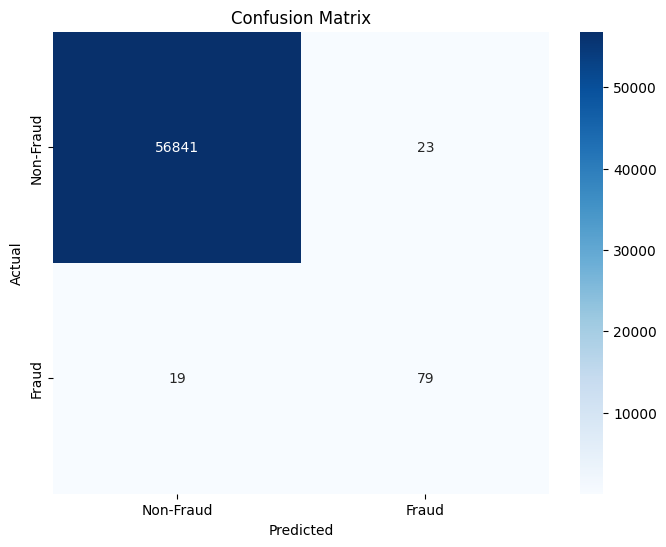

In [ ]:
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize the NearestCentroid model
final_model = NearestCentroid()

# Fit the model on the downsampled training data
final_model.fit(X_train_downsampled, y_train_downsampled)

# Predict on the original test data
y_pred = final_model.predict(X_test_orig)

# Generate classification report
report = classification_report(y_test_orig, y_pred)
print("Classification Report:\n", report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_orig, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    The Final model demonstrates excellent performance in identifying normal transactions and shows strong, though slightly less perfect, performance in detecting fraudulent transactions. The high accuracy is somewhat skewed by the imbalanced dataset, but the F1 score for fraudulent transactions indicates that the model is effective at detecting fraud while maintaining a good balance between precision and recall.
</div>

# 10. Conclusions


1. **Effective Model Development:** Through meticulous data preprocessing, feature selection, and model optimization steps, we've developed a robust fraud detection model.
   
2. **Importance of Imbalance Handling:** Addressing the imbalance in the dataset was critical. Downsampling the majority class improved model performance by ensuring balanced representation of fraudulent and non-fraudulent transactions.

6. **Real-world Application:** The methodologies and techniques applied here are crucial for real-world applications, where the cost of misclassifying fraudulent transactions can be substantial both financially and in terms of trust and customer satisfaction.

7. **Future Directions:** Further enhancements could involve exploring advanced feature engineering techniques, integrating additional data sources, or deploying the model in a real-time environment to continuously improve fraud detection capabilities.